In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
from env import user, password, host

### 1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [2]:
url = f"mysql+pymysql://{user}:{password}@{host}/zillow"

In [3]:
query = '''
            
SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
FROM properties_2017

LEFT JOIN propertylandusetype USING(propertylandusetypeid)

WHERE propertylandusedesc IN ("Single Family Residential",                       
                              "Inferred Single Family Residential")'''

In [4]:
# Read data from the tables in the zillow database

import os

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_zillow_data():
    filename = "zillow.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        query = '''
            
        SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
        FROM properties_2017

        LEFT JOIN propertylandusetype USING(propertylandusetypeid)

        WHERE propertylandusedesc IN ("Single Family Residential",                       
                              "Inferred Single Family Residential")'''
        df = pd.read_sql(query, get_connection('zillow'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df


In [5]:
df = get_zillow_data()

### 2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

In [6]:
df.head()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [7]:
df.shape

(2152864, 8)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2152864.0,1.076432e+06,621478.449302,0.00,538215.7500,1076431.500,1.614647e+06,2152863.00
bedroomcnt,2152853.0,3.287195e+00,0.954757,0.00,3.0000,3.000,4.000000e+00,25.00
bathroomcnt,2152853.0,2.230687e+00,0.999281,0.00,2.0000,2.000,3.000000e+00,32.00
calculatedfinishedsquarefeet,2144379.0,1.862855e+03,1222.125124,1.00,1257.0000,1623.000,2.208000e+03,952576.00
taxvaluedollarcnt,2152371.0,4.618961e+05,699675.940049,1.00,188170.0000,327671.000,5.345270e+05,98428909.00
yearbuilt,2143526.0,1.960950e+03,22.162196,1801.00,1949.0000,1958.000,1.976000e+03,2016.00
taxamount,2148422.0,5.634864e+03,8178.908996,1.85,2534.9725,4108.945,6.414318e+03,1337755.86
fips,2152864.0,6.048377e+03,20.433289,6037.00,6037.0000,6037.000,6.059000e+03,6111.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          float64
dtypes: float64(7), int64(1)
memory usage: 131.4 MB


In [10]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 8 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    2152864 non-null  int64  
 1   bedroomcnt                    2152853 non-null  float64
 2   bathroomcnt                   2152853 non-null  float64
 3   calculatedfinishedsquarefeet  2144379 non-null  float64
 4   taxvaluedollarcnt             2152371 non-null  float64
 5   yearbuilt                     2143526 non-null  float64
 6   taxamount                     2148422 non-null  float64
 7   fips                          2152864 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 131.4 MB


In [11]:
# Find the total number of Null values in each column of our DataFrame.
df.isnull().sum()

Unnamed: 0                         0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8485
taxvaluedollarcnt                493
yearbuilt                       9338
taxamount                       4442
fips                               0
dtype: int64

In [12]:
# Check for any Null values in each column of our DataFrame.
df.isnull().any()

Unnamed: 0                      False
bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [13]:
# Return the names for any columns in our DataFrame with any Null values.
df.columns[df.isnull().any()]

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount'],
      dtype='object')

In [ ]:
#Building a function to clean the data

def clean_zillow(df):
    ''' This function takes in zillow data and returns a clean dataset.
    '''
    # renaming columns
    df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'area',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built',
                          'taxamount':'tax_amount'
                    })
    
    # Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df. 
    df = df.replace(r'^\s*$', np.nan, regex=True)
    

In [14]:
# renaming columns
df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'area',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built',
                          'taxamount':'tax_amount'
                    })

In [15]:
df.head()

,Unnamed: 0,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
0,0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [16]:
# Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.

df = df.replace(r'^\s*$', np.nan, regex=True)

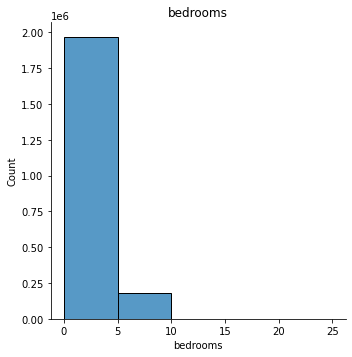

In [17]:
# making distribution plots BEDROOMS

sns.displot(x='bedrooms', data=df, bins=5)
plt.title('bedrooms')
plt.show()

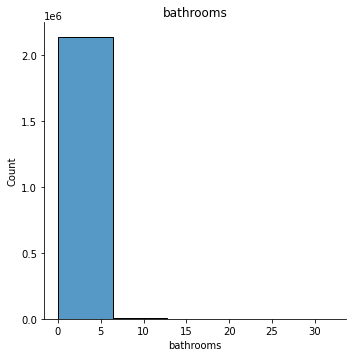

In [18]:
sns.displot(x='bathrooms', data=df, bins=5)
plt.title('bathrooms')
plt.show()

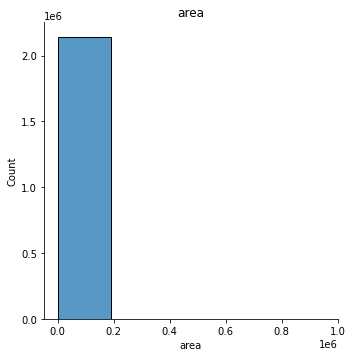

In [19]:
sns.displot(x='area', data=df, bins=5)
plt.title('area')
plt.show()

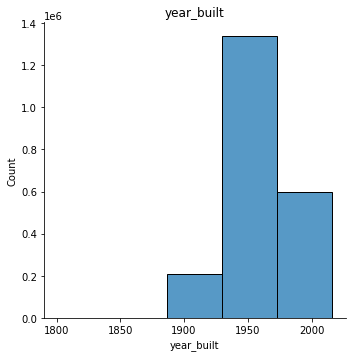

In [20]:
sns.displot(x='year_built', data=df, bins=5)
plt.title('year_built')
plt.show()

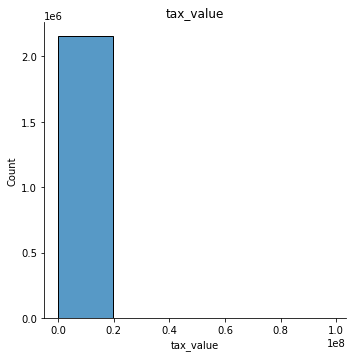

In [21]:
sns.displot(x='tax_value', data=df, bins=5)
plt.title('tax_value')
plt.show()

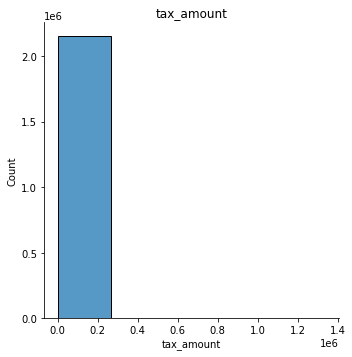

In [22]:
sns.displot(x='tax_amount', data=df, bins=5)
plt.title('tax_amount')
plt.show()

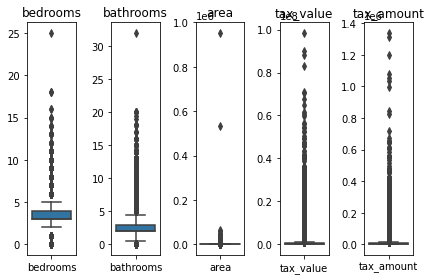

In [23]:
#Looking at outliers
# List of columns
cols = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'tax_amount']

for i, col in enumerate(cols):

    plot_number = i + 1
    # Create subplot
    plt.subplot(1, len(cols), plot_number)
    # Title with column name
    plt.title(col)
    # Display boxplot for column.
    sns.boxplot(data=df[[col]])
    # sets proper spacing between plots
    plt.tight_layout()

plt.show()

In [24]:
#Taking IQR approach to removing outliers
# IQR
Q1 = np.percentile(df['bedrooms'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['bedrooms'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

In [25]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [26]:
#IQR range for bedrooms
upper, lower = outliers(df, "bedrooms")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  5.5
Lower Whisker:  1.5


In [27]:
#IQR range for bathrooms
upper,lower = outliers(df,'bathrooms')
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  4.5
Lower Whisker:  0.5


In [28]:
#IQR range for area
upper,lower = outliers(df,'area')
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  3634.5
Lower Whisker:  -169.5


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   bedrooms    float64
 2   bathrooms   float64
 3   area        float64
 4   tax_value   float64
 5   year_built  float64
 6   tax_amount  float64
 7   fips        float64
dtypes: float64(7), int64(1)
memory usage: 131.4 MB


In [30]:
#Making a function to remove the outliers from entire dataset
#Using 1.5 for limits

def remove_outliers(df,feature_list):
    
    for feature in feature_list:
    
        #define interquartile range
        Q1= df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        #Set limits
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        #remove outliers
        df = df[(df[feature] > lower_limit) & (df[feature] < upper_limit)]
    
    return df

In [31]:
df = remove_outliers(df,['bedrooms','bathrooms','area','tax_value','tax_amount'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1855285 entries, 6 to 2152863
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   bedrooms    float64
 2   bathrooms   float64
 3   area        float64
 4   tax_value   float64
 5   year_built  float64
 6   tax_amount  float64
 7   fips        float64
dtypes: float64(7), int64(1)
memory usage: 127.4 MB


In [33]:
#Checking for null values now
df.isnull().sum()

Unnamed: 0      0
bedrooms        0
bathrooms       0
area            0
tax_value       0
year_built    874
tax_amount      0
fips            0
dtype: int64

In [34]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1855285 entries, 6 to 2152863
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1855285 non-null  int64  
 1   bedrooms    1855285 non-null  float64
 2   bathrooms   1855285 non-null  float64
 3   area        1855285 non-null  float64
 4   tax_value   1855285 non-null  float64
 5   year_built  1854411 non-null  float64
 6   tax_amount  1855285 non-null  float64
 7   fips        1855285 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 127.4 MB


In [35]:
#Remove remainder of outliers
df.dropna(inplace = True)

In [36]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854411 entries, 6 to 2152863
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1854411 non-null  int64  
 1   bedrooms    1854411 non-null  float64
 2   bathrooms   1854411 non-null  float64
 3   area        1854411 non-null  float64
 4   tax_value   1854411 non-null  float64
 5   year_built  1854411 non-null  float64
 6   tax_amount  1854411 non-null  float64
 7   fips        1854411 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 127.3 MB
